# Testing Saving and Loading Salient Regions

This notebook tests the saving and loading of the salient regions

In [110]:
# setup
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from pprint import pprint

import salientregions as sr
import scipy.io as sio

In [111]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


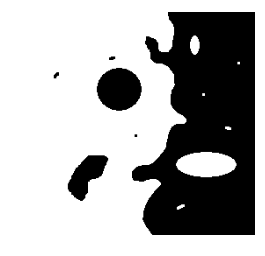

In [112]:
# load the test image
testdata_images_path = '../tests/images/Binary/'
testdata_features_path = '../tests/features/Binary/'

image = cv2.imread(os.path.join(testdata_images_path, 'Binary_all_types_noise.png'), cv2.IMREAD_GRAYSCALE)
sr.show_image(image)

In [113]:
# load MATLAB SE and set up parameters and detector
SE = sio.loadmat(os.path.join(testdata_features_path,"SE_all.mat"))['SE_n']
lam = 50
area_factor = 0.05
connectivity = 4
binarydetector = sr.BinaryDetector(SE=SE, lam=lam, area_factor=area_factor, 
                                                connectivity=connectivity)


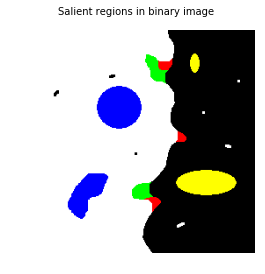

In [114]:
# run detector
regions = binarydetector.detect(image, find_holes=True, find_islands=True,
       find_indentations=True, find_protrusions=True, visualize=True)


In [115]:
# find the equivalent ellipses (both using standard and polynimial coefficients)
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, min_square=False)
print("Total number of regions detected: ", sum(num_regions.values()))
print("Number of features per saliency type: ", num_regions)
#sr.visualize_ellipses(regions["holes"], features_standard["holes"])
#sr.visualize_ellipses(regions["islands"], features_standard["islands"])
#sr.visualize_ellipses(regions["indentations"], features_standard["indentations"])
#sr.visualize_ellipses(regions["protrusions"], features_standard["protrusions"])
#sr.visualize_elements_ellipses(image, features_standard);

('Total number of regions detected: ', 9)
('Number of features per saliency type: ', {'indentations': 2, 'islands': 2, 'holes': 2, 'protrusions': 3})


In [116]:
# print the feature representations
print "Elliptic standard features: \n"
pprint(features_standard) 
print "\n Elliptic polynomial features: \n"
pprint(features_poly)

Elliptic standard features: 

{'holes': array([[  64.16392517,  186.19673157,   14.        ,   29.        ,
         -53.84181595,    1.        ],
       [ 101.        ,   89.        ,   24.        ,   25.        ,
          -0.        ,    1.        ]]),
 'indentations': array([[ 126.83078003,  185.14614868,    9.        ,   11.        ,
          -7.12501669,    3.        ],
       [ 142.13699341,   45.80137253,   19.        ,    9.        ,
         -42.87890625,    3.        ]]),
 'islands': array([[ 200. ,  175. ,   14. ,   34. ,   -0. ,    2. ],
       [ 187. ,   38.5,   10. ,    5. ,   -0. ,    2. ]]),
 'protrusions': array([[ 140.4133606 ,  197.19857788,    8.        ,    7.        ,
         -32.73522949,    4.        ],
       [ 172.16401672,  123.34799957,    5.        ,    5.        ,
         -79.69515228,    4.        ],
       [ 153.5       ,   40.        ,    6.        ,    7.        ,
          -0.        ,    4.        ]])}

 Elliptic polynomial features: 

{'holes': 

In [117]:
# save the ellipsies in txt files
filename_standard = (os.path.join(testdata_features_path,'features_standard.txt'))
total_num_regions = sr.save_ellipse_features2file(num_regions, features_standard, filename_standard)
print("Total_num_regions (standard)", total_num_regions)
filename_poly = (os.path.join(testdata_features_path,'features_poly.txt'))
total_num_regions = sr.save_ellipse_features2file(num_regions, features_poly, filename_poly)
print("Total_num_regions (poly)", total_num_regions)


('Total_num_regions (standard)', 9)
('Total_num_regions (poly)', 9)


In [118]:
# loading the ellipses from the txt files
total_num_regions, num_regions, features_standard_loaded = sr.load_ellipse_features_from_file(filename_standard)
print("Features standard: ")
print("Total_num_regions: ", total_num_regions)
print("Number of features per saliency type: ", num_regions)

total_num_regions, num_regions, features_poly_loaded = sr.load_ellipse_features_from_file(filename_poly)
print("\n Features standard: ")
print("Total_num_regions: ", total_num_regions)
print("Number of features per saliency type: ", num_regions)

Features standard: 
('Total_num_regions: ', 9)
('Number of features per saliency type: ', {'indentations': 2, 'islands': 2, 'holes': 2, 'protrusions': 3})

 Features standard: 
('Total_num_regions: ', 9)
('Number of features per saliency type: ', {'indentations': 2, 'islands': 2, 'holes': 2, 'protrusions': 3})


In [119]:
#comapre the loaded ellipses with the original ones
print "Comparing the original standard and the loaded features: \n"
if all(features_standard[k]==features_standard_loaded[k] for k in features_standard):
    print "The same! \n"
else:
    print "Different! \n"

print "Comparing the original polynomial and the loaded features: \n"
if all(features_poly[k]==features_poly_loaded[k] for k in features_poly):
    print "The same! \n"
else:
    print "Different! \n"


Comparing the original standard and the loaded features: 

The same! 

Comparing the original polynomial and the loaded features: 

The same! 



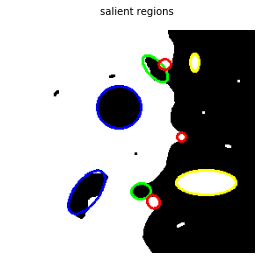

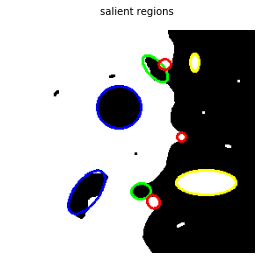

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,

In [121]:
# visualise the original and the  loaded (only standard is supported!)
sr.visualize_elements_ellipses(image, features_standard);
sr.visualize_elements_ellipses(image, features_standard_loaded);
#sr.visualize_elements_ellipses(image, features_poly);